**About the Model :**
The neural network model created for this metro dataset consists of two hidden layers, each with 64 neurons, designed to capture complex patterns and relationships within the data. By utilizing a deep learning approach, the model aims to accurately predict the 'status' variable, effectively handling the non-linear and intricate dependencies likely present in the diverse range of features from the metro operational metrics.

**Why TensorFlow and Keras?**

Handling Large and Complex Datasets: since metro dataset is large or complex, TensorFlow and Keras can efficiently handle such datasets. Deep learning models, particularly those built with these frameworks, are known for their ability to process and extract patterns from large volumes of data.

Feature Learning: Deep learning models have the capability to automatically learn and extract features from raw data. This can be particularly useful since dataset contains complex patterns or relationships that are not easily captured with traditional machine learning models.

Non-linear Relationships: Neural networks, which can be easily built using TensorFlow and Keras, are adept at capturing non-linear relationships in the data. The metro dataset has intricate dependencies between variables, a neural network might model these relationships more effectively than a simpler linear model.

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9856 - loss: 0.0625
Epoch 2/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9914 - loss: 0.0323
Epoch 3/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9928 - loss: 0.0269
Epoch 4/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9924 - loss: 0.0256
Epoch 5/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9929 - loss: 0.0249
Epoch 6/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9935 - loss: 0.0226
Epoch 7/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9938 - loss: 0.0203
Epoch 8/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9940 - loss: 0.0205
Epoch 9/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9936 - loss: 0.0197
Epoch 10/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9929 - loss: 0.0215
Epoch 11/100
4756/4756 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9938 - loss: 0.0192
Epoch 12/100
475

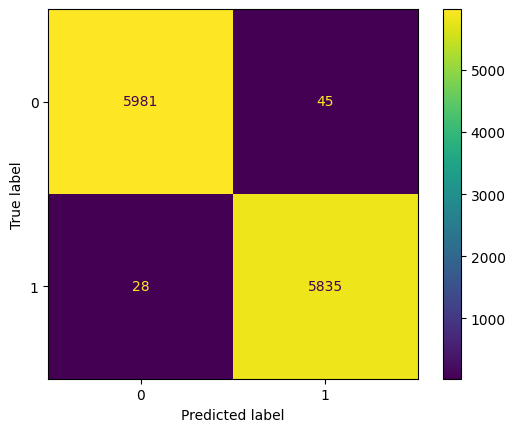

0.9938598704685003
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889

372/372 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


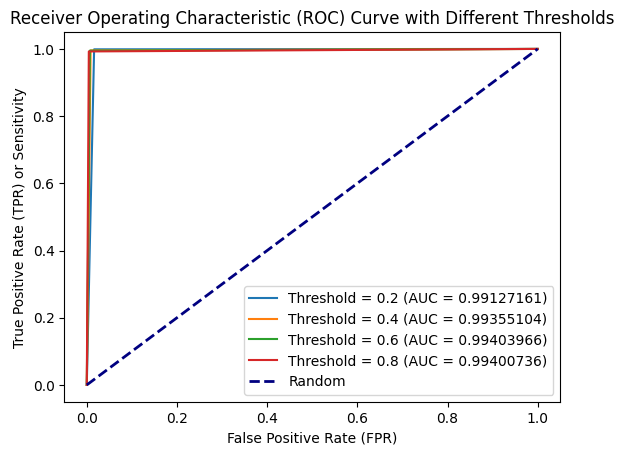

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Read the dataset
data = pd.read_csv('Clean_Data.csv')

# Preprocessing the data
X = data.iloc[:, 2:-1]  # Features
y = data.iloc[:, -1]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Display the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Accuracy score
print(accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict(X_test).flatten()
for threshold in [0.2, 0.4, 0.6, 0.8]:
    y_pred_threshold = (y_prob > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Threshold = {:.1f} (AUC = {:.8f})'.format(threshold, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Thresholds')
plt.legend(loc='lower right')
plt.show()